In [1]:
# Change the name of the file and run the whole code
chat_file = open('chat_vanshika.txt', encoding = "utf8")
chat_text = chat_file.read()
chat_list = chat_text.split('\n')

In [2]:
for i in range(len(chat_list)):
    chat_list[i] = chat_list[i][20:]
    if ':' in chat_list[i]:
        ind  = chat_list[i].index(':') + 1
        chat_list[i] = chat_list[i][ind:]

In [3]:
word_dict = {}
for i in range(len(chat_list)):
    sentence = chat_list[i]
    words = sentence.split()
    for word in words:
        if word in word_dict:
            word_dict[word] += 1
        else:
            word_dict[word] = 1
common = []
for w in sorted(word_dict, key=word_dict.get, reverse=True):
    common.append(w)

In [4]:
hinglish = open('stop_hinglish.txt')
stop_words = hinglish.read().split('\n')

personalised = ['tyi', 'liyo', 'ha', 'tk', 'ki', 'hi', 'aj', 'hn', 'ke', 'bhi', 'tha', 'kar', 'rha', 'tu', 'ko', 'na', 'isa', 'ab', 'isko', 'acha', 'dia', 'bey', 'sun', 'par', 'mkha', 'ar', 'ib', 'ibe', 'hoya', 'tne', 'kre', 'bera', 'hmbe', 'yo', 'te', 'mne', 'hogya', 'hove', 'fer', 'ak', 'kite', 'nu', 'dhore', 'kite', 'merko', 'ahi', 'oi', 'yu', 'erko', 'bs', 'padh', 'lag', 'kaam', 'din', 'meko', 'yaar', 'time', 'achha', 'zyada', 'haa', 'arey', 'matlab', 'terko', 'bhot', 'aa', 'and', 'ni', 'fr', 'deleted', 'atlab', 'aar', 'gyi', 'a', 'gya', 'jaati', 'jaata', 'baat', ' ', '', '  ', 'media', 'omitted', 'okayy', 'okay', 'okayyy', 'okayyyy', 'okayyyyy']
stop_words = stop_words + personalised

In [5]:
import re
new_sentence = ''
for i in range(len(chat_list)):
    sentence = chat_list[i]
    sentence = re.sub(r'[^\w\s]', '', sentence).lower()
    sentence = re.sub(r"(^|\W)\d+", '', sentence)
    if sentence != '':
        chat_list[i] = sentence
    words = sentence.split()
    for i in words:
        if i not in stop_words:
            new_sentence = new_sentence + i + ' '

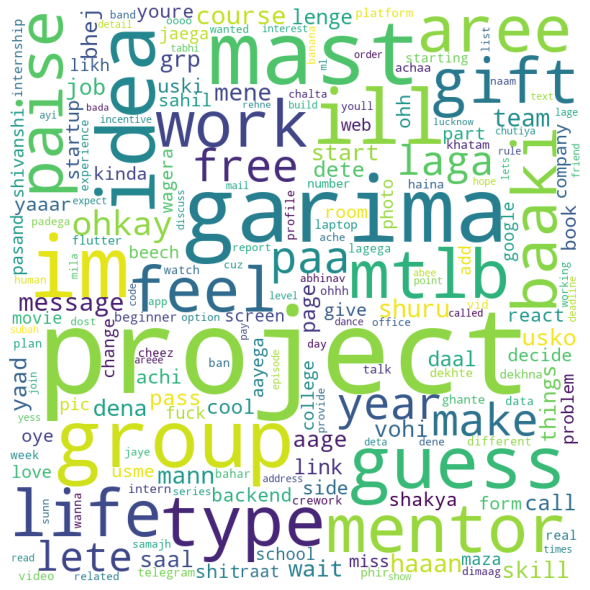

In [6]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
wordcloud = WordCloud(width = 800, height = 800,
                      background_color = 'white',
                      stopwords = stop_words,
                      min_font_size = 10).generate(new_sentence)

plt.figure(figsize = (8,8), facecolor= None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)

plt.show()